## Simulate and fit DCE-MRI

In [3]:
import sys
sys.path.append('..\\src')
sys.path.append('..\\..\\DCE-DSC-MRI_CodeCollection\\src')
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np

---
### Concentration-time data

parameter: value (ground truth)
vp: 0.0193 (0.0200)
ps: 0.0517 (0.0500)
ve: 0.0999 (0.1000)
fp: 14.8209 (15.0000)


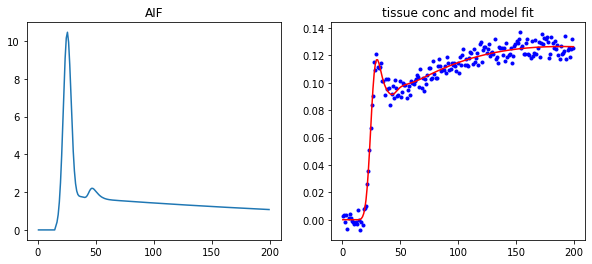

In [101]:
from dce import aifs, pk_models, dce_fit

# define timepoints
dt = 1.
t = np.arange(0,200)*dt + dt/2

# define AIF, pharmacokinetic model and noise level
aif = aifs.parker(hct=0.42, t_start=15.)
pk_pars = {'vp': 0.02, 'ps': 5e-2, 've': 0.1, 'fp': 15, 'ktrans': 5e-2}
pk_model = pk_models.tcxm(t, aif) # <-- CHANGE THE MODEL HERE
noise = 0.005

# generate "measured" concentration with noise
c_t, _c_cp, _c_e = pk_model.conc(**pk_pars)
c_t += np.random.normal(loc = 0., scale = noise, size = c_t.shape)

# fit measured concentration using the same pharmacokinetic model
fit_opts = {'pk_pars_0': {'vp': 0.05, 'ps': 1e-4, 've': 0.2, 'fp': 30, 'ktrans': 1e-4}}
pk_pars_fit, c_t_fit = dce_fit.conc_to_pkp(c_t, pk_model, fit_opts)

print("parameter: value (ground truth)")
[ print(f"{key}: {val:.4f} ({pk_pars[key]:.4f})") for key, val in pk_pars_fit.items() ]

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(t, aif.c_ap(t));
ax[0].set_title('AIF');
ax[1].plot(t, c_t, 'b.', t, c_t_fit, 'r-');
ax[1].set_title('tissue conc and model fit');

---
### Signal-time data